<a href="https://colab.research.google.com/github/rvp3011/Lab0/blob/main/Practice_Activity_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [18]:
import pandas as pd
df = pd.read_csv('ha_1.csv')
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('ha_1.csv')

df['diagnosis_numeric'] = df['diagnosis'].apply(lambda x: 1 if x == 'Disease' else 0)

X = df[['age', 'chol']]
y = df['diagnosis_numeric']

log_reg_model = LogisticRegression()
log_reg_model.fit(X, y)

def calculate_cholesterol(age, target_probability, model):
    b0 = model.intercept_[0]
    b1 = model.coef_[0, 0]
    b2 = model.coef_[0, 1]

    log_odds = np.log(target_probability / (1 - target_probability))
    chol = (log_odds - b0 - (b1 * age)) / b2
    return chol

age_55 = 55
chol_50_percent = calculate_cholesterol(age_55, 0.50, log_reg_model)
chol_90_percent = calculate_cholesterol(age_55, 0.90, log_reg_model)

print(chol_50_percent)
print(chol_90_percent)


367.8748897985851
-851.9660996782114


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)

print("Linear Discriminant Analysis model fitted successfully.")

age_val = 55


coef_age = lda_model.coef_[0, 0]
coef_chol = lda_model.coef_[0, 1]
intercept = lda_model.intercept_[0]


chol_lda = (-intercept - (coef_age * age_val)) / coef_chol

print(chol_lda)


Linear Discriminant Analysis model fitted successfully.
368.23535752993797


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np


svc_model = SVC(kernel='linear', probability=True, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy', verbose=0)

grid_search.fit(X, y)

best_svc_model = grid_search.best_estimator_

print(grid_search.best_params_['C'])
print(grid_search.best_score_)


age_val = 55


coef_age_svc = best_svc_model.coef_[0, 0]
coef_chol_svc = best_svc_model.coef_[0, 1]
intercept_svc = best_svc_model.intercept_[0]


chol_svc = (-intercept_svc - (coef_age_svc * age_val)) / coef_chol_svc

print(chol_svc)


0.1
0.5982926829268294
312.7019396029427


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

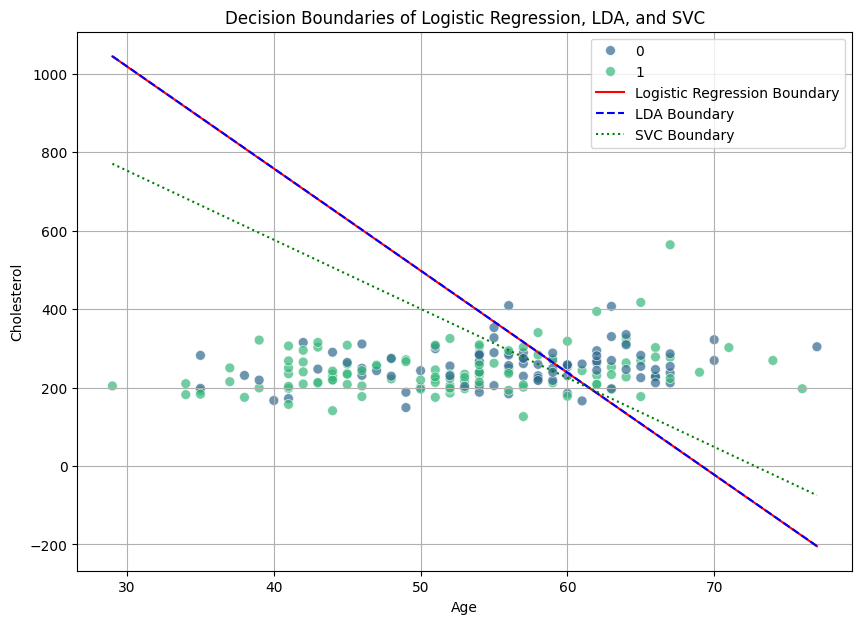

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='age', y='chol', hue='diagnosis_numeric', palette='viridis', alpha=0.7, s=50)

age_range = np.linspace(df['age'].min(), df['age'].max(), 100)


b0_lr = log_reg_model.intercept_[0]
b1_lr = log_reg_model.coef_[0, 0]
b2_lr = log_reg_model.coef_[0, 1]
chol_lr_boundary = (-b0_lr - (b1_lr * age_range)) / b2_lr
plt.plot(age_range, chol_lr_boundary, color='red', linestyle='-', label='Logistic Regression Boundary')


b0_lda = lda_model.intercept_[0]
b1_lda = lda_model.coef_[0, 0]
b2_lda = lda_model.coef_[0, 1]
chol_lda_boundary = (-b0_lda - (b1_lda * age_range)) / b2_lda
plt.plot(age_range, chol_lda_boundary, color='blue', linestyle='--', label='LDA Boundary')

b0_svc = best_svc_model.intercept_[0]
b1_svc = best_svc_model.coef_[0, 0]
b2_svc = best_svc_model.coef_[0, 1]
chol_svc_boundary = (-b0_svc - (b1_svc * age_range)) / b2_svc
plt.plot(age_range, chol_svc_boundary, color='green', linestyle=':', label='SVC Boundary')

plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Decision Boundaries of Logistic Regression, LDA, and SVC')
plt.legend()
plt.grid(True)
plt.show()